<a href="https://colab.research.google.com/github/HarshitaBansal17/INTERNET_SERVICE_CHURN/blob/main/INTERNET_SERVICE_CHURN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTERNET SERVICE CHURN PREDICTION**

---



---




### > **Objectives**

* To identify the customers on the basis of their profiles that are likely to churn with available features.
* To build models that predict whether customers will churn or not.


---




**What is Churn?**

Churn is a measurement of the percentage of accounts that cancel or choose not to renew their subscriptions.


*   Churn rates can be applied to subscription-based businesses as well to the number of employees that leave a firm.
*   The churn rate and growth rate are diametrically opposite factors, as the former measures the loss of customers and the other measures the acquisition of customers.




### **Introduction to data**
The dataset consist of the following features:
1) is_tv_subscriber customer - has a tv subscription ?

2) is_movie_package_subscriber?

3) subscription_age - how many year has the customer use our service

4) bill_avg - last 3 months bill avg

5) remaining_contract - how many year remaining for customer contract. If null; customer didn't have a contract. the customer who has a contract time have to use their service until contract end.if they canceled their service before contract time end they pay a penalty fare.

Two ways in which a customer could be using the services. One through a time-bound contract which costs less and another through a normal monthly subscription which obviously costs more. So, even if a person is not in a contract, he's still a user who's paying monthly fees.

5) service_failure_count customer - call count to call center for service failure for last 3 months

6) download_avg - last 3 months internet usage (GB)

7) upload_avg last - 3 months upload avg (GB)

8) download_over_limit - most of customer has a download limit. if they reach this limit they have to pay for this. this column contain "limit over count" for last 9 months

9) churn - this is the target column. if 1 customer canceled his service

The dataset is taken from https://www.kaggle.com/mehmetsabrikunt/internet-service-churn/metadata

Consist of 72275 rows and 11 columns.





# **Importing all the library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# **Importing and reading the csv**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/internet_service__churn.csv')

# **Checking all the infomation**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     72274 non-null  int64  
 1   tv_subscriber          72274 non-null  int64  
 2   movie_subscriber       72274 non-null  int64  
 3   subscription_age       72274 non-null  float64
 4   bill_avg               72274 non-null  int64  
 5   remaining_contract     50702 non-null  float64
 6   service_failure_count  72274 non-null  int64  
 7   download_avg           71893 non-null  float64
 8   upload_avg             71893 non-null  float64
 9   download_over_limit    72274 non-null  int64  
 10  churn                  72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [5]:
df.nunique()

id                       72274
tv_subscriber                2
movie_subscriber             2
subscription_age          1110
bill_avg                   179
remaining_contract         247
service_failure_count       19
download_avg              2856
upload_avg                 802
download_over_limit          8
churn                        2
dtype: int64

### **DATA CLEANING**


In [6]:
#deleting the id column
del df['id']

In [7]:
#removing duplicate rows
df=df.drop_duplicates()
df

,tv_subscriber,movie_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,0,0,6.39,0,NaN,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...
72269,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,0,0,0.01,0,0.72,0,0.0,0.0,0,1


# **Missing value treatment**

In [8]:
df.dropna(subset=['download_avg','upload_avg'], how='any', inplace=True)

In [9]:
df['remaining_contract'] = df['remaining_contract'].fillna(0)

In [10]:

df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 69940 entries, 0 to 72273
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tv_subscriber          69940 non-null  int64  
 1   movie_subscriber       69940 non-null  int64  
 2   subscription_age       69940 non-null  float64
 3   bill_avg               69940 non-null  int64  
 4   remaining_contract     69940 non-null  float64
 5   service_failure_count  69940 non-null  int64  
 6   download_avg           69940 non-null  float64
 7   upload_avg             69940 non-null  float64
 8   download_over_limit    69940 non-null  int64  
 9   churn                  69940 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 5.9 MB


In [11]:
df = df.reset_index()
del df['index']
df.index.name = 'User'
df.index = df.index + 1
df

,tv_subscriber,movie_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
User,,,,,,,,,,
1,1,0,11.95,25,0.14,0,8.4,2.3,0,0
2,0,0,8.22,0,0.00,0,0.0,0.0,0,1
3,1,0,8.91,16,0.00,0,13.7,0.9,0,1
4,0,0,6.87,21,0.00,1,0.0,0.0,0,1
5,0,0,6.39,0,0.00,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...
69936,1,1,0.09,0,1.25,0,0.0,0.0,0,1
69937,1,0,0.06,1,1.63,0,0.8,0.0,0,1
69938,1,0,0.02,0,2.19,0,1.5,0.2,0,1


In [12]:
df.describe()

,tv_subscriber,movie_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,69940.000000,69940.000000,69940.000000,69940.000000,69940.000000,69940.000000,69940.000000,69940.000000,69940.000000,69940.000000
mean,0.824621,0.340177,2.484896,19.262611,0.511319,0.282771,44.909335,4.309101,0.208021,0.544710
std,0.380294,0.473772,2.037549,13.182697,0.669636,0.828186,63.857882,9.929691,0.997778,0.498001
min,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.950000,13.000000,0.000000,0.000000,8.200000,0.600000,0.000000,0.000000
50%,1.000000,0.000000,1.980000,19.000000,0.000000,0.000000,29.150000,2.200000,0.000000,1.000000
75%,1.000000,1.000000,3.370000,23.000000,1.050000,0.000000,61.800000,5.000000,0.000000,1.000000
max,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


# **EDA AND DATA VISUALIZATION**

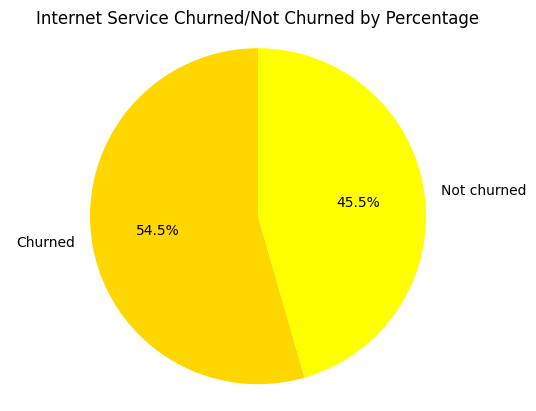

In [13]:
x = len(df[df['churn']== 1])
y = len(df[df['churn']== 0])
data = [x, y]
label = ['Churned', 'Not churned']

plt.pie(data, labels=label,autopct='%1.1f%%', colors=['gold', 'yellow'],startangle=90)
plt.title('Internet Service Churned/Not Churned by Percentage')
plt.axis('equal')
plt.show()


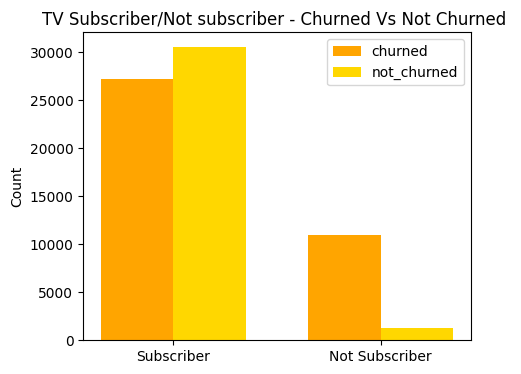

In [14]:
tv_subscriber_churned  = len(df[(df['tv_subscriber'] == 1) & (df['churn'] == 1)])
not_tv_subscriber_churned  = len(df[(df['tv_subscriber'] == 0) & (df['churn'] == 1)])
tv_subscriber_not_churned  = len(df[(df['tv_subscriber'] == 1) & (df['churn'] == 0)])
not_tv_subscriber_not_churned  = len(df[(df['tv_subscriber'] == 0) & (df['churn'] == 0)])

labels = ['Subscriber', 'Not Subscriber']
churn = [tv_subscriber_churned, not_tv_subscriber_churned]
no_churn = [tv_subscriber_not_churned, not_tv_subscriber_not_churned ]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
plt.figure(figsize=(5,4))
plt.bar(x - width/2, churn, width, label='churned', color='orange')
plt.bar(x + width/2, no_churn, width, label='not_churned', color='gold')
plt.ylabel('Count')
plt.xticks(x, labels)
plt.title('TV Subscriber/Not subscriber - Churned Vs Not Churned ')
plt.legend()
plt.show()



**ANALYSIS**

1.Here the target group is who all have TV subscription but does not have internet subcription

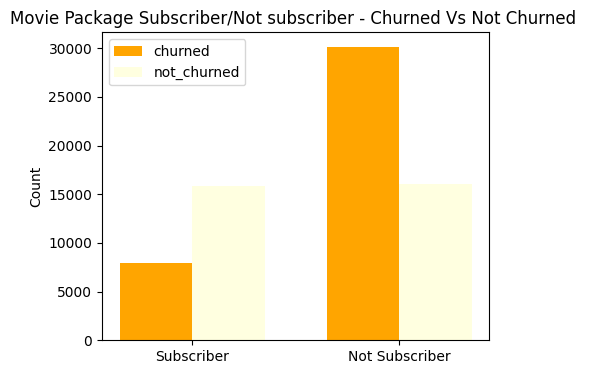

In [15]:
movie_subscriber_churned  = len(df[(df['movie_subscriber'] == 1) & (df['churn'] == 1)])
not_movie_subscriber_churned  = len(df[(df['movie_subscriber'] == 0) & (df['churn'] == 1)])
movie_subscriber_not_churned  = len(df[(df['movie_subscriber'] == 1) & (df['churn'] == 0)])
not_movie_subscriber_not_churned  = len(df[(df['movie_subscriber'] == 0) & (df['churn'] == 0)])

labels = ['Subscriber', 'Not Subscriber']
churn = [movie_subscriber_churned, not_movie_subscriber_churned]
no_churn = [movie_subscriber_not_churned, not_movie_subscriber_not_churned]
c1 = ['orange']
c2=['lightyellow']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
plt.figure(figsize=(5,4))
plt.bar(x - width/2, churn, width, label='churned', color=c1)
plt.bar(x + width/2, no_churn, width, label='not_churned', color=c2)
plt.ylabel('Count')
plt.xticks(x, labels)
plt.title('Movie Package Subscriber/Not subscriber - Churned Vs Not Churned ')

plt.legend()
plt.show()


<Axes: title={'center': 'User by TV subscriber/Movie Subscriber/Churn'}, xlabel='tv_subscriber,movie_subscriber,churn', ylabel='Count'>

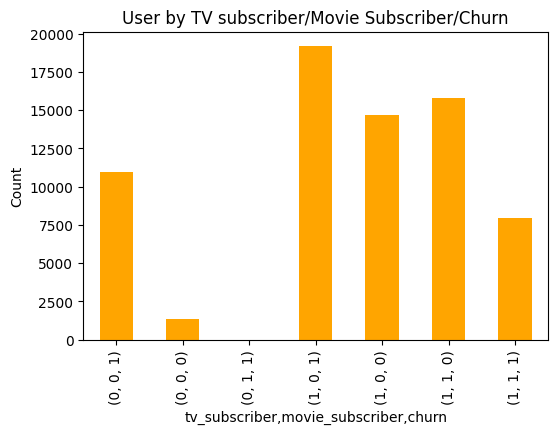

In [16]:
x = df.groupby(['tv_subscriber', 'movie_subscriber'])['churn'].value_counts()
plt.figure(figsize=(6,4))
plt.ylabel('Count')
x.plot(kind='bar', color = 'orange', title="User by TV subscriber/Movie Subscriber/Churn")



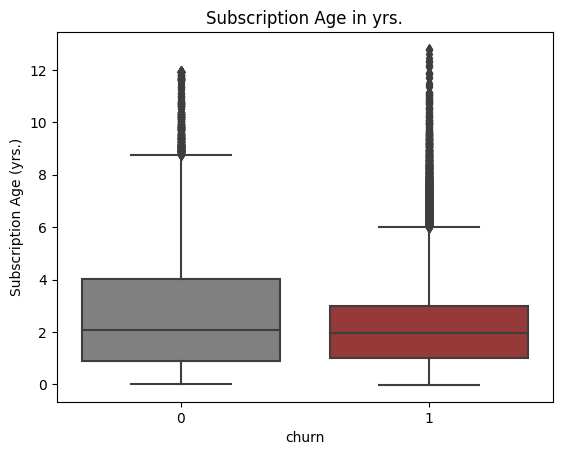

In [17]:
my_colors = ["grey","brown"]
sns.set_palette( my_colors )
sns.boxplot(x="churn",y="subscription_age", data= df)
plt.ylabel('Subscription Age (yrs.)')
sns.set(rc={"figure.figsize":(7, 7)})
plt.title('Subscription Age in yrs.')
plt.show()


In [18]:
x = df[['churn', 'subscription_age']]
y = x.query('churn <= 0')
y.describe()


,churn,subscription_age
count,31843.0,31843.000000
mean,0.0,2.743422
std,0.0,2.334756
min,0.0,0.020000
25%,0.0,0.890000
50%,0.0,2.070000
75%,0.0,4.040000
max,0.0,11.950000


In [19]:
no_contract_churned = len(df[(df['remaining_contract'] == 0) & (df['churn'] == 1)])
contract_remain_churned = len(df[~(df['remaining_contract']== 0) & (df['remaining_contract'] != 0.0) & (df['churn'] == 1)])
contract_over_churned  = len(df[(df['remaining_contract']==0) & (df['churn'] == 1)])
no_contract_no_churned = len(df[(df['remaining_contract']==0) & (df['churn'] == 0)])
contract_remain_not_churned = len(df[~(df['remaining_contract']==0) & (df['remaining_contract'] != 0.0) & (df['churn'] == 0)])
contract_over_not_churned  = len(df[(df['remaining_contract'] == 0.0) & (df['churn'] == 0)])



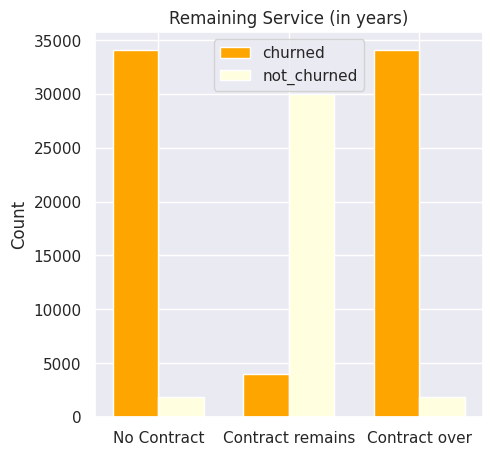

In [20]:
labels = ['No Contract','Contract remains', 'Contract over']
churn = [no_contract_churned,contract_remain_churned , contract_over_churned]
no_churn = [no_contract_no_churned,contract_remain_not_churned , contract_over_not_churned]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
plt.figure(figsize=(5,5))
ay = plt.bar(x - width/2, churn, width, label='churned', color = c1)
ax = plt.bar(x + width/2, no_churn, width, label='not_churned',color = c2)
plt.xticks(x, labels)
plt.ylabel('Count')

plt.title('Remaining Service (in years)')
plt.legend()

plt.show()


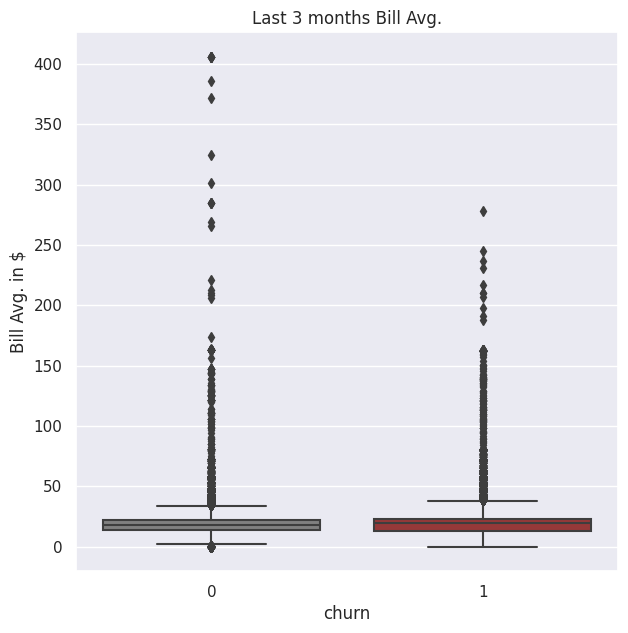

In [21]:
my_colors = ["grey","brown"]
sns.set_palette( my_colors )
sns.boxplot(x="churn",y="bill_avg",data=df )
sns.set(rc={"figure.figsize":(10, 7)})
plt.title('Last 3 months Bill Avg.')
plt.ylabel('Bill Avg. in $')
plt.show()


## **ANALYSIS**


1. This shows that most people greater than  6 year of subcription have churned the subscription.
2.The data related to age group is rightly skewed

In [22]:

x = df[['churn', 'bill_avg']]
y = x.query('churn == 1')
y.describe()

,churn,bill_avg
count,38097.0,38097.000000
mean,1.0,19.127438
std,0.0,13.065055
min,1.0,0.000000
25%,1.0,13.000000
50%,1.0,20.000000
75%,1.0,23.000000
max,1.0,278.000000


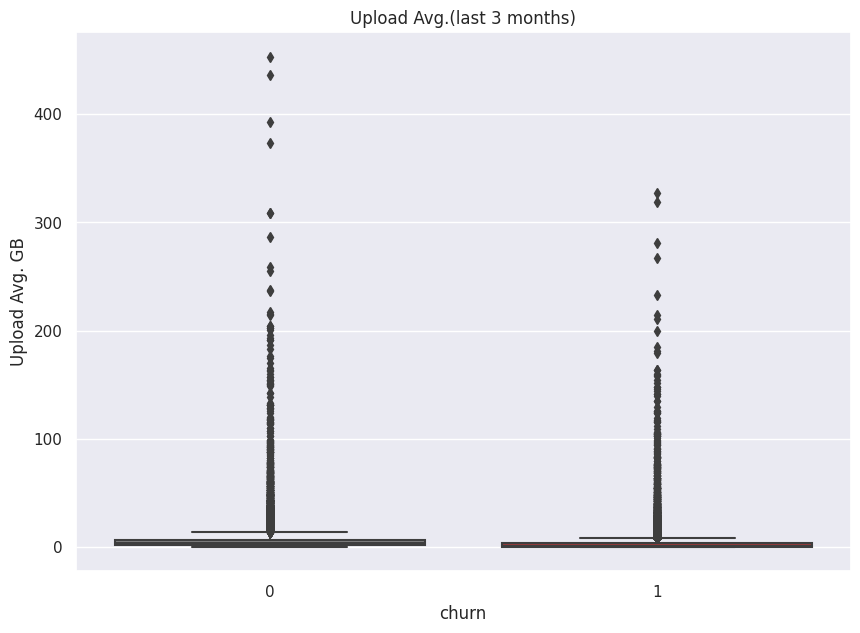

In [23]:
my_colors = ["grey","brown"]
sns.set_palette( my_colors )
sns.boxplot(x="churn",y="upload_avg",data= df)
sns.set(rc={"figure.figsize":(10, 7)})
plt.title('Upload Avg.(last 3 months)')
plt.ylabel('Upload Avg. GB')
plt.show()



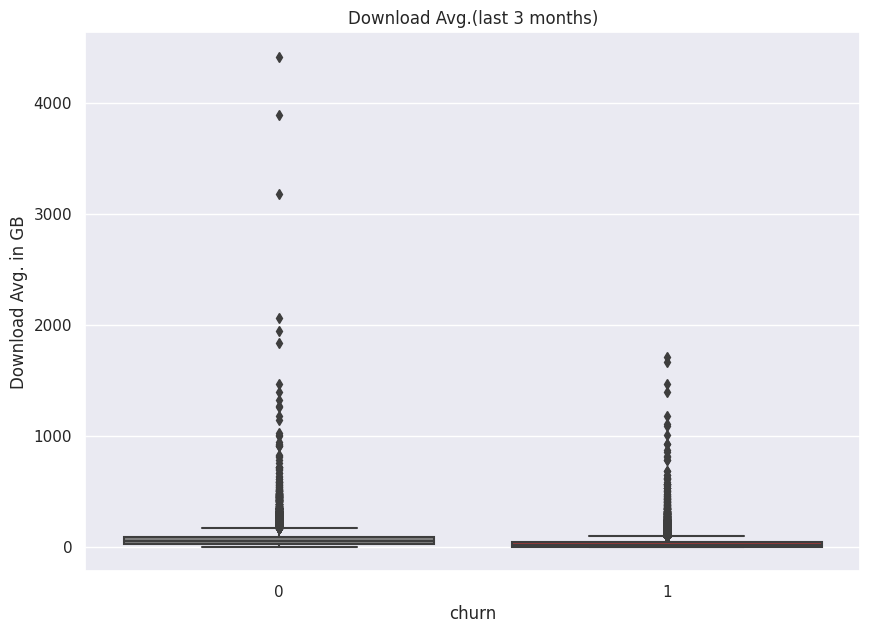

In [24]:

my_colors = ["grey","brown"]
sns.set_palette( my_colors )
sns.boxplot(x="churn",y="download_avg",data= df)
sns.set(rc={"figure.figsize":(10, 7)})
plt.title('Download Avg.(last 3 months)')
plt.ylabel('Download Avg. in GB')
plt.show()



In [25]:
x = df[['churn', 'download_avg']]

y = x.query('churn == 1')
y.describe()


,churn,download_avg
count,38097.0,38097.000000
mean,1.0,28.213101
std,0.0,46.893323
min,1.0,0.000000
25%,1.0,0.500000
50%,1.0,13.600000
75%,1.0,38.600000
max,1.0,1706.200000


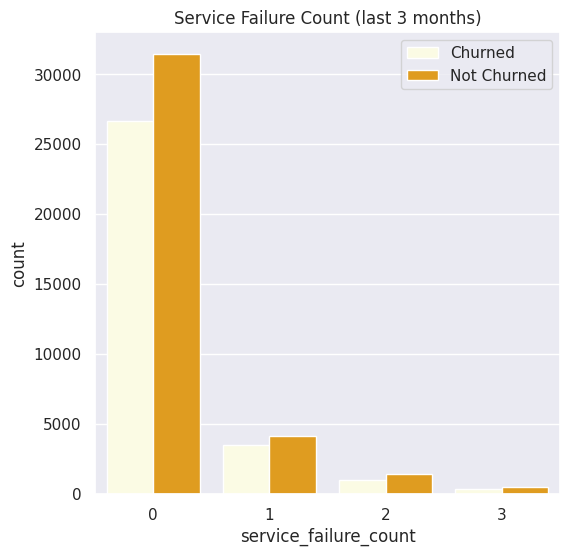

In [26]:

import matplotlib.pyplot as plt
import seaborn as sns

data = df[df['service_failure_count'] < 4]
plt.figure(figsize=(6, 6))
my_colors = ['lightyellow', 'orange']
sns.set_palette(my_colors)

churned_label = 'Churned'
not_churned_label = 'Not Churned'

sns.countplot(data=data, x='service_failure_count', hue='churn')

# Get the handles and labels of the legend
handles, labels = plt.gca().get_legend_handles_labels()

# Assign custom titles to the legend colors
legend_labels = [churned_label, not_churned_label]
plt.legend(handles, legend_labels)

plt.title('Service Failure Count (last 3 months)')
plt.show()



# **ANALYSIS**
1.As we can see that for those whose sercive failure count is 0 have high proportion of not churned people

```

```



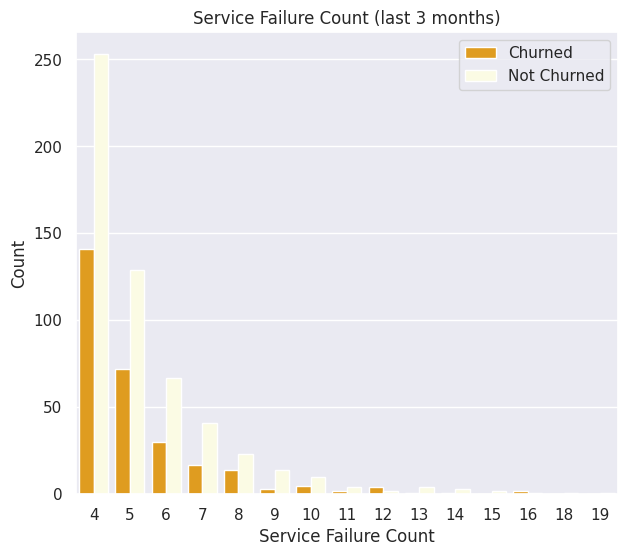

In [27]:


data = df[df['service_failure_count'] >= 4]

# Define the colors for the plot
churned_color = 'orange'
not_churned_color = 'lightyellow'

# Create the countplot using seaborn
plt.figure(figsize=(7, 6))

# Generate the countplot
sns.countplot(data=data, x='service_failure_count', hue='churn', palette=[churned_color, not_churned_color])

# Set the title and axis labels
plt.title('Service Failure Count (last 3 months)')
plt.xlabel('Service Failure Count')
plt.ylabel('Count')

# Get the legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Assign custom titles to the legend colors
legend_labels = ['Churned', 'Not Churned']
plt.legend(handles, legend_labels)

plt.show()



# **ANALYSIS**

1.As service failure count increases there is a significant decrease in not churned data while churn data is not decreasing that rapidly

In [28]:
df.groupby('service_failure_count')['churn'].value_counts()


service_failure_count  churn
0                      1        31443
                       0        26663
1                      1         4139
                       0         3501
2                      1         1446
                       0         1000
3                      1          514
                       0          387
4                      1          253
                       0          141
5                      1          129
                       0           72
6                      1           67
                       0           30
7                      1           41
                       0           17
8                      1           23
                       0           14
9                      1           14
                       0            3
10                     1           10
                       0            5
11                     1            4
                       0            2
12                     0            4
                     

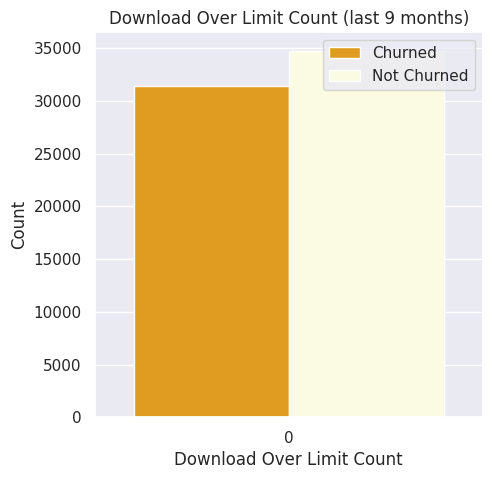

In [29]:



data = df[df['download_over_limit'] < 1]

# Define the colors for the plot
churned_color = 'orange'
not_churned_color = 'lightyellow'

# Create the countplot using seaborn
plt.figure(figsize=(5, 5))

# Generate the countplot
sns.countplot(data=data, x='download_over_limit', hue='churn', palette=[churned_color, not_churned_color])

# Set the title and axis labels
plt.title('Download Over Limit Count (last 9 months)')
plt.xlabel('Download Over Limit Count')
plt.ylabel('Count')

# Get the legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Assign custom titles to the legend colors
legend_labels = ['Churned', 'Not Churned']
plt.legend(handles, legend_labels)

plt.show()



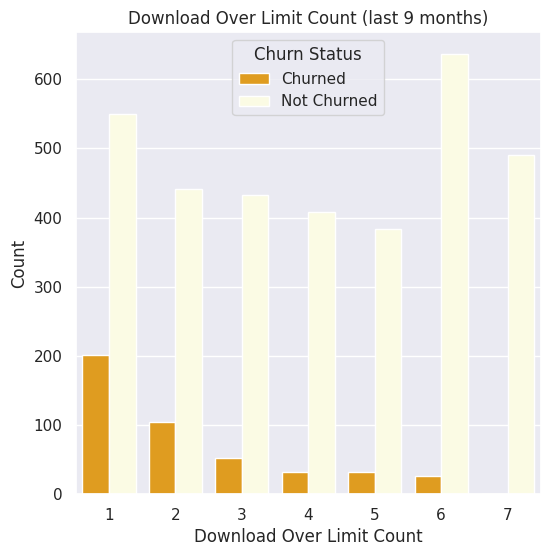

In [30]:


# Filter the data based on the condition
data = df[df['download_over_limit'] >= 1]

# Define the colors for the plot
churned_color = 'orange'
not_churned_color = 'lightyellow'

# Create the countplot using seaborn
plt.figure(figsize=(6, 6))

# Generate the countplot
sns.countplot(data=data, x='download_over_limit', hue='churn', palette=[churned_color, not_churned_color])

# Set the title and axis labels
plt.title('Download Over Limit Count (last 9 months)')
plt.xlabel('Download Over Limit Count')
plt.ylabel('Count')

# Get the legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Assign custom titles to the legend colors
legend_labels = ['Churned', 'Not Churned']
plt.legend(handles, legend_labels, title='Churn Status')

plt.show()


# **ANALYSIS**

1.For those whose download over count is greater than 3 have churned the least

2.Download over count 7 people haven't churned at all

In [31]:
df.groupby('download_over_limit')['churn'].value_counts()

download_over_limit  churn
0                    1        34756
                     0        31393
1                    1          549
                     0          202
2                    1          441
                     0          105
3                    1          433
                     0           52
4                    1          408
                     0           32
5                    1          383
                     0           32
6                    1          636
                     0           26
7                    1          491
                     0            1
Name: churn, dtype: int64

# **To check multicollinearity**

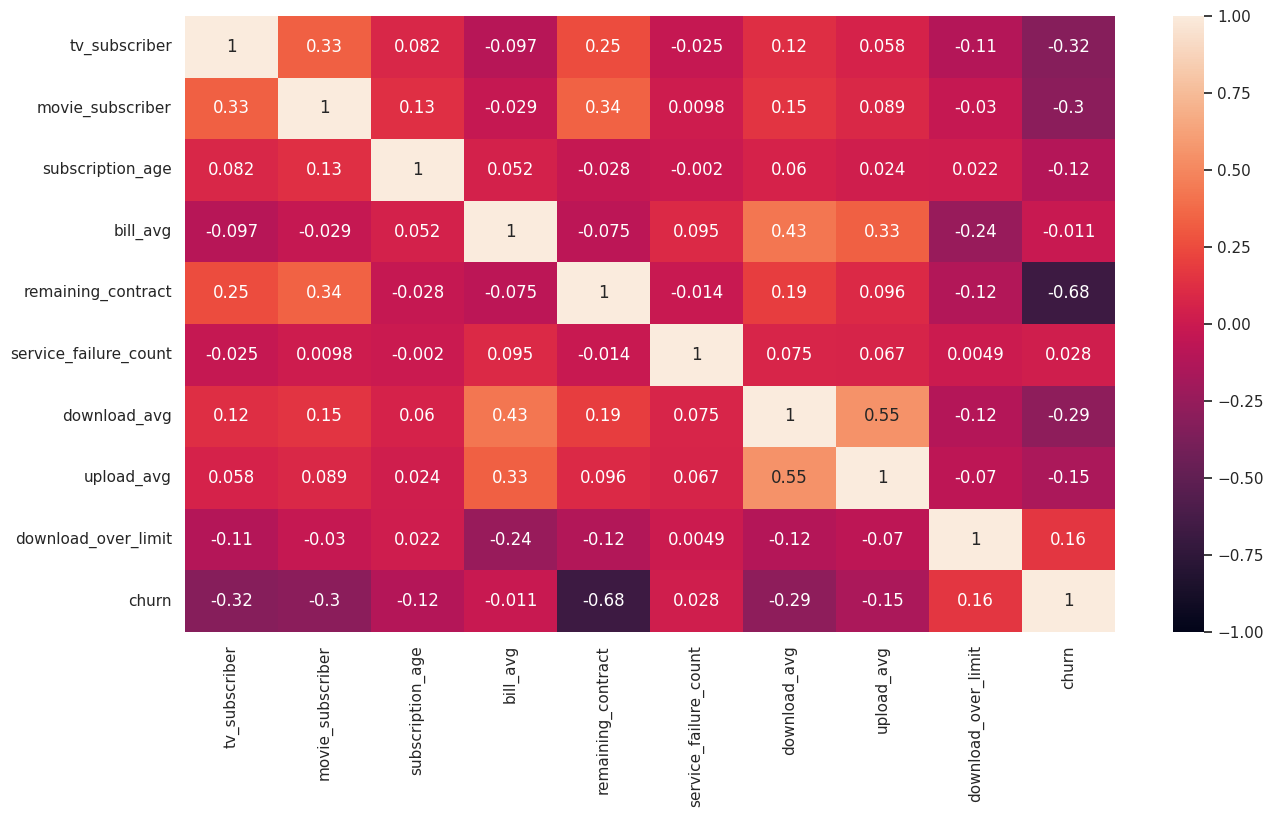

In [32]:
correlation = df.corr()
plt.figure(figsize=(15,8))

sns.heatmap(correlation,vmin=-1,vmax=1,annot=True)
plt.show()


In [33]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [34]:
# the independent variables set
X = df.iloc[:-1]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)


                 feature       VIF
0          tv_subscriber  4.452635
1       movie_subscriber  1.892918
2       subscription_age  2.362281
3               bill_avg  3.677469
4     remaining_contract  2.301292
5  service_failure_count  1.131285
6           download_avg  2.595975
7             upload_avg  1.737151
8    download_over_limit  1.129238
9                  churn  2.516260



# **ANALYSIS**

1. There is no multicollinearity as all the vif values are <5

2. This shows that independent variable are not dependent on each other


# **DATA TRANSFORMATION**

In [35]:
#Importing necessary modules
from sklearn.preprocessing import RobustScaler
from sklearn. model_selection import train_test_split

In [36]:
X = df.drop(['churn'],axis=1)
y=df['churn']

In [37]:
X

,tv_subscriber,movie_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
User,,,,,,,,,
1,1,0,11.95,25,0.14,0,8.4,2.3,0
2,0,0,8.22,0,0.00,0,0.0,0.0,0
3,1,0,8.91,16,0.00,0,13.7,0.9,0
4,0,0,6.87,21,0.00,1,0.0,0.0,0
5,0,0,6.39,0,0.00,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
69936,1,1,0.09,0,1.25,0,0.0,0.0,0
69937,1,0,0.06,1,1.63,0,0.8,0.0,0
69938,1,0,0.02,0,2.19,0,1.5,0.2,0


### **FEATURE SCALING**

In [38]:
#feature Scaling
#(X - Q1) / (Q3 - Q1)
#the RobustScaler is less affected by the presence of outliers compared to other scaling methods such as the StandardScaler
rs = RobustScaler().fit(X)
rs.transform(X)


array([[ 0.        ,  0.        ,  4.11983471, ..., -0.38712687,
         0.02272727,  0.        ],
       [-1.        ,  0.        ,  2.5785124 , ..., -0.54384328,
        -0.5       ,  0.        ],
       [ 0.        ,  0.        ,  2.86363636, ..., -0.28824627,
        -0.29545455,  0.        ],
       ...,
       [ 0.        ,  0.        , -0.80991736, ..., -0.51585821,
        -0.45454545,  0.        ],
       [-1.        ,  0.        , -0.81404959, ..., -0.54384328,
        -0.5       ,  0.        ],
       [ 0.        ,  1.        , -0.81404959, ..., -0.54384328,
        -0.5       ,  0.        ]])

# **MODEL BUILDING**

In [39]:
#split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)


# **1.LOGISTIC REGRESSION**
```

```



In [43]:
#Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
# Defining Parameters
parameters = {'penalty' : ['l2'],
              'C': [0.1, 0.3, 0.6],
              'max_iter': [100, 200, 300]
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=-1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.3, 0.6], 'max_iter': [100, 200, 300],
                         'penalty': ['l2']},
             verbose=5)

In [44]:
lr = LogisticRegression()

In [ ]:
#Choosing best parameters
best_clf = clf.best_params_ , clf.best_score_
best_clf

({'C': 0.6, 'max_iter': 200, 'penalty': 'l2'}, 0.8688697791032609)

In [45]:
#Instantiate the Logistic Regression
lr1 = LogisticRegression(C=0.6, penalty='l2', verbose=5,max_iter=200)
lr1.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished


LogisticRegression(C=0.6, max_iter=200, verbose=5)

In [46]:
y_pred = lr1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
lr1.score(X_test,y_test)


0.8681727194738347

## **1.1 Confusion matrix**

([<matplotlib.axis.YTick at 0x7fb789ccac80>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

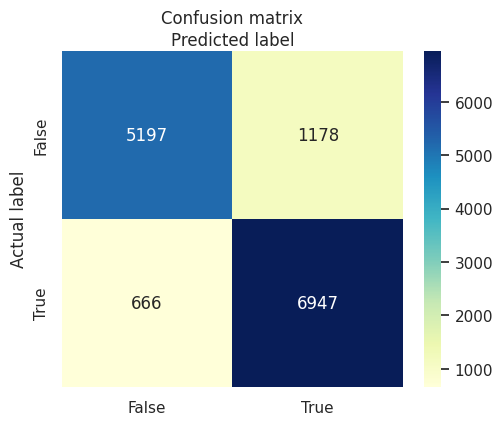

In [47]:
# Create heatmap from the confusion matrix
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


In [48]:
#Evaluation Metrics
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
print(precision_score(y_test, y_pred), ": is the precision score")
print(recall_score(y_test, y_pred), ": is the recall score")
print(f1_score(y_test, y_pred), ": is the f1 score")


0.8681727194738347 : is the accuracy score
0.8550153846153846 : is the precision score
0.9125180612110863 : is the recall score
0.8828313635785996 : is the f1 score


## **1.2 AUC-ROC CURVE**

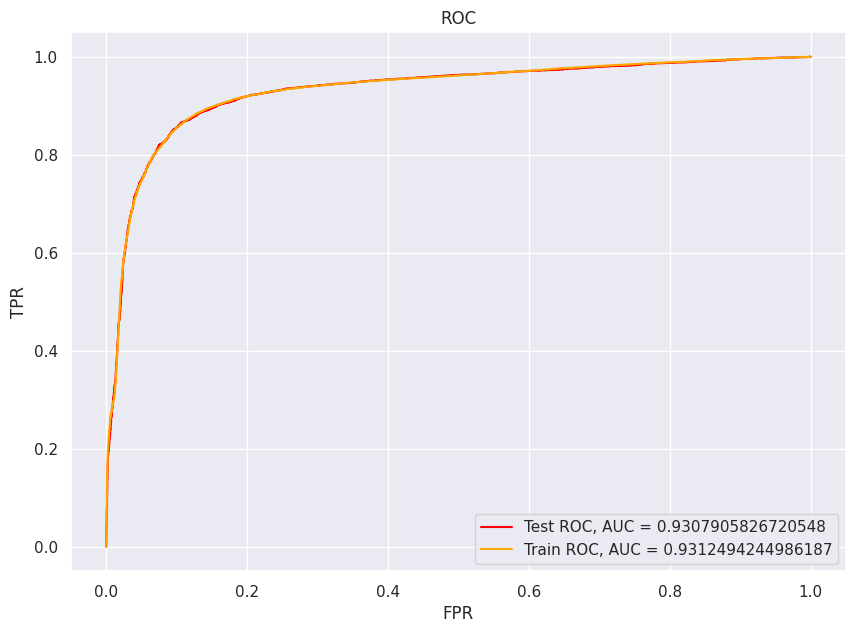

AUC on Test data is 0.9307905826720548
AUC on Train data is 0.9312494244986187


In [49]:
pred_test = lr1.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = lr1.predict_proba(X_train)[:,1]
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, pred_train)

# ROC curve
plt.plot(fpr1, tpr1, color='red', label='Test ROC, AUC = ' + str(roc_auc_score(y_test, pred_test)))
plt.plot(fpr2, tpr2, color='orange', label='Train ROC, AUC = ' + str(roc_auc_score(y_train, pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

print("AUC on Test data is " + str(roc_auc_score(y_test, pred_test)))
print("AUC on Train data is " + str(roc_auc_score(y_train, pred_train)))


# **ANALYSIS**

1.It suggests that the model's performance is consistent between the two datasets.

2.This scenario indicates that the model generalizes well to unseen data, which is desirable.

# **2.KNN CLASSIFIER**

In [51]:
#Importing necessary modules
from sklearn.neighbors import KNeighborsClassifier


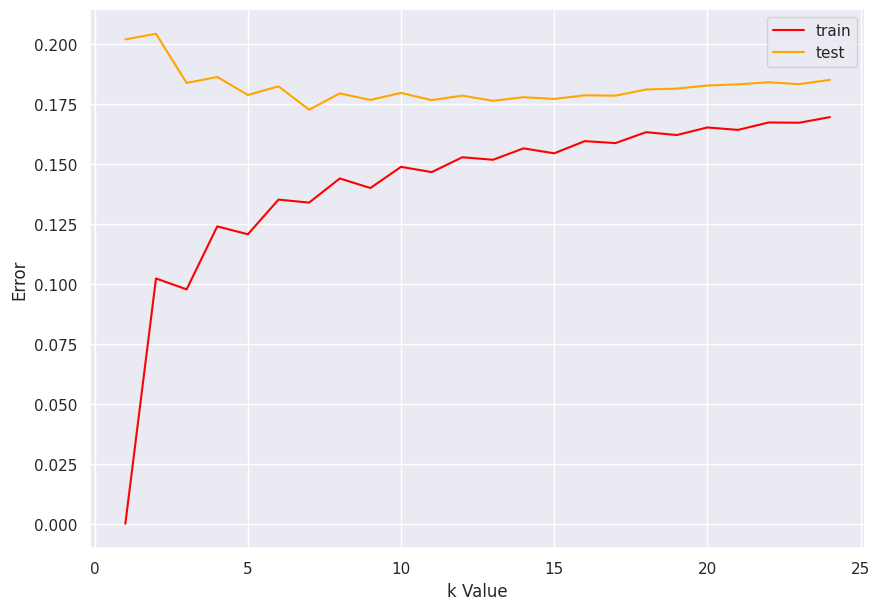

In [52]:
error1 = []
error2 = []

for k in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred1 = knn.predict(X_train)
    error1.append(np.mean(y_train != y_pred1))
    y_pred2 = knn.predict(X_test)
    error2.append(np.mean(y_test != y_pred2))

plt.plot(range(1, 25), error1, color='red', label="train")
plt.plot(range(1, 25), error2, color='orange', label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
plt.show()




In [53]:
#Instantiate the K Neighbors Classifier
classifier = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
classifier.fit(X_train,y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [54]:
y_pred =  classifier.predict(X_test)
y_pred


array([1, 1, 0, ..., 1, 1, 1])

## **2.1 Confusion matrix**

In [55]:
cnf_matrix1= confusion_matrix(y_test,y_pred)

([<matplotlib.axis.YTick at 0x7fb78950c760>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

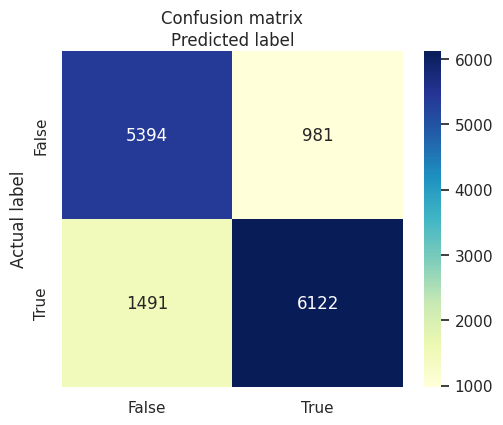

In [56]:
# Create heatmap from the confusion matrix
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


In [57]:
#Evaluation metrics
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
print(precision_score(y_test, y_pred), ": is the precision score")
print(recall_score(y_test, y_pred), ": is the recall score")
print(f1_score(y_test, y_pred), ": is the f1 score")


0.8232770946525594 : is the accuracy score
0.8618893425313248 : is the precision score
0.8041507946932878 : is the recall score
0.8320195705354716 : is the f1 score


## **2.2 AOC-ROC CURVE**

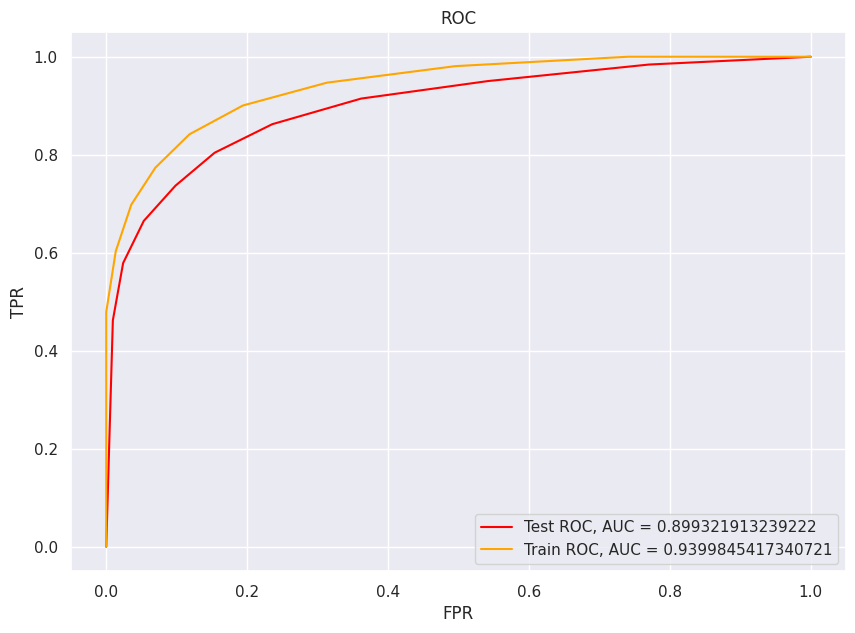

AUC on Test data is 0.899321913239222
AUC on Train data is 0.9399845417340721


In [58]:
pred_test = classifier.predict_proba(X_test)[:, 1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = classifier.predict_proba(X_train)[:, 1]
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, pred_train)

# ROC curve
plt.plot(fpr1, tpr1, color='red', label='Test ROC, AUC = ' + str(roc_auc_score(y_test, pred_test)))
plt.plot(fpr2, tpr2, color='orange', label='Train ROC, AUC = ' + str(roc_auc_score(y_train, pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

print("AUC on Test data is " + str(roc_auc_score(y_test, pred_test)))
print("AUC on Train data is " + str(roc_auc_score(y_train, pred_train)))



# **ANALYSIS**
1. It indicates that there might be some degree of overfitting.

2.Overfitting occurs when the model performs well on the training data but struggles to generalize to unseen data.

# **3.RANDOM FOREST**

In [ ]:
# Import the modules we are using
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Defining Parameters
param_dist = {"max_features": [2,3,5],
              "min_samples_leaf": [3,4,6],
              "criterion": ["gini"],
              "n_estimators": [500]}


# Build the grid search
dfrst = RandomForestClassifier()
grid = GridSearchCV(estimator=dfrst, param_grid=param_dist, cv = 5, n_jobs=-1)
grid_results = grid.fit(X_train, y_train)
grid.best_params_, grid.best_score_



({'criterion': 'gini',
  'max_features': 5,
  'min_samples_leaf': 3,
  'n_estimators': 500},
 0.9418787294686325)

In [ ]:
# Extract the best decision forest
best_clf = grid_results.best_estimator_
y_pred = best_clf.predict(X_test)

# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)


## **3.1 Confusion matrix**

([<matplotlib.axis.YTick at 0x7f3984072650>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

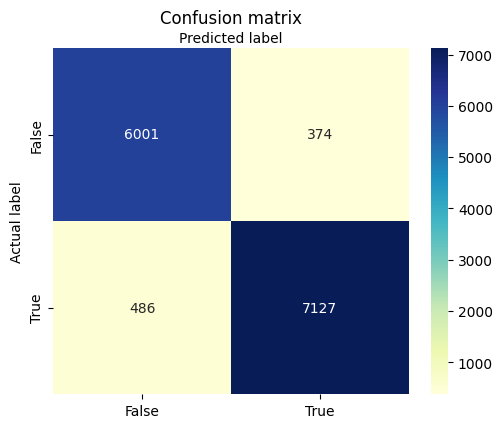

In [ ]:
# Create heatmap from the confusion matrix
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


In [ ]:
#Evaluation Metrics
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
print(precision_score(y_test, y_pred), ": is the precision score")
print(recall_score(y_test, y_pred), ": is the recall score")
print(f1_score(y_test, y_pred), ": is the f1 score")


0.9385187303402917 : is the accuracy score
0.9501399813358219 : is the precision score
0.9361618284513332 : is the recall score
0.9430991134047902 : is the f1 score


# **4.ADABOOST**


In [ ]:
#Importing Modules
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Instantiate a classifier
ada = AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', max_depth=1,
                                        min_samples_split=4,
                                        max_leaf_nodes=5),
                                         n_estimators=1000,learning_rate=0.2)

In [ ]:
ada.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    max_leaf_nodes=5,
                                                    min_samples_split=4),
                   learning_rate=0.2, n_estimators=1000)

In [ ]:
y_pred=ada.predict(X_test)


In [ ]:
#Evaluation metrics
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
print(precision_score(y_test, y_pred), ": is the precision score")
print(recall_score(y_test, y_pred), ": is the recall score")
print(f1_score(y_test, y_pred), ": is the f1 score")

0.93279954246497 : is the accuracy score
0.9480327648717605 : is the precision score
0.9273610928674636 : is the recall score
0.9375830013280213 : is the f1 score


#Hyperparameter Tuning using Grid Search


In [ ]:
#Hyperparameter Tuning using Grid Search
ada_1 = GridSearchCV(ada, {'learning_rate':[0.1,0.15,0.20],'n_estimators':[500, 750, 1000]}, scoring = 'roc_auc', cv=5)
ada_1.fit(X_train,y_train)
print(ada_1.best_score_)
print(ada_1.best_params_)


In [ ]:
#Using best parameters
ada_2 =  AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', max_depth=1,
                                        min_samples_split=4,
                                        max_leaf_nodes=5),
                                        n_estimators=1000, learning_rate=0.2)

ada_2.fit(X_train,y_train)
y_pred=ada_2.predict(X_test)
# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

## **4.1 Confusion matrix**

([<matplotlib.axis.YTick at 0x7f3983ec7cd0>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

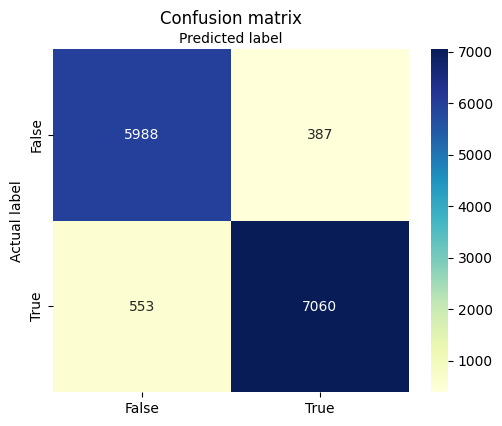

In [ ]:
# Create heatmap from the confusion matrix
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


In [ ]:
#Evaluation metrics
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
print(precision_score(y_test, y_pred), ": is the precision score")
print(recall_score(y_test, y_pred), ": is the recall score")
print(f1_score(y_test, y_pred), ": is the f1 score")

0.93279954246497 : is the accuracy score
0.9480327648717605 : is the precision score
0.9273610928674636 : is the recall score
0.9375830013280213 : is the f1 score


# **RESULTS**

In [ ]:
df= pd.DataFrame({'Accuracy' : [82.3,86.8,94.1,93.2],
                 'Precision' : [86.1,85.5,95.6,94.8],
                 'Recall' : [80.4,91.3,93.4,92.7],
                 'F1' : [83.2,88.3,94.5,93.7]},
                 index=['KNN Neighbours', 'Logistic Regression', 'Random Forest', 'AdaBoost'])
df

,Accuracy,Precision,Recall,F1
KNN Neighbours,82.3,86.1,80.4,83.2
Logistic Regression,86.8,85.5,91.3,88.3
Random Forest,94.1,95.6,93.4,94.5
AdaBoost,93.2,94.8,92.7,93.7


# **CONCLUSION**


## Random  Classifier has turned out to be the best classifier among all four models as our objective was to identify potential users who were more likely to churn and by achieving a recall score of 93.4%.


